. 

<font size=7>Opto Streamer Code

In this notebook we create the first dry run of a closed loop maxwell/opto system.

set up notebook

In [3]:
import MaxwellGI as mgi

In [4]:
import time

<font color="red">
    
**To Do**
* Build function checking USB devices
* Calibration (get distribution of firing rates)
* turn into a function where person set window time and results is an array of binned spikes.
* ignore first spike count
* look into glitch of high spike count near onset of initializtion for spike counter
* Set up system for recording multiple files and specifying which one's have action in them
* Kate ask to turn of print messages
* Create gui for john andrews

# <font color=red>Turn this into a calibration function

<font color="red">

* set spike counter window
* set how long it should run for

In [ ]:
### Set up Maxwell and Opto
maxwell = mgi.MaxwellCtl( config="/home/mxwbio/work/seizure_closed_loop/files/maxwell/configs/2023_03_31_opto_test.cfg")              # Turn Maxwell On
stream  = mgi.Streamer( maxwell, filtered=False )                                                                       # Start Livestream
#opto_ctl = mgi.OptoCtl( log_file="./files/opto/logs/opto_test", 
#                   calibration_file="./files/opto/calibrations/20230203T152939-ucsf-opto-system-a_real-625nm-1a-v1.csv", arduino_path="/dev/ttyACM11")       # Set up Opto
#maxwell.recordingStart( data_file="/home/mxwbio/work/seizure_closed_loop/files/maxwell/recordings/2023_03_31_chip16753_optotest.h5")   # Start recording data             




# Define Closed Loop Experiment
print("Starting closed loop")
last_opto = 0
experiment_end = time.time() + 50                                    # End the experiment in 20 seconds
first_time = True
spike_counts = []
while time.time() < experiment_end:                                  # while the experiment hasn't run for 20 seconds
    count_time = time.time() + .5                                     # Count spikes over 1 second window
    spike_count = 0                                                  # continually add new spikes to spike_count
    while time.time() < count_time:                                  # while still in 1 second window
        frameID, voltages, spikes = stream.getData()                 # get spikes data
        for spike in spikes:                                         # if there's a spike add it to the spike_count
            spike_count += 1
    print("Spike Count: ", spike_count )    
    if not first_time:
        spike_counts.append(spike_count)
    first_time = False

    
print("experiment finished")    



# Shut Down Experiment
print("shutting down devices")
del stream                # Stop Stream
#opto_ctl.close()          # Stop Opto
#maxwell.recordingStop()  # stop recording
print("done")

In [ ]:
import matplotlib.pyplot as plt


plt.hist(spike_counts, bins='auto')  # arguments are passed to np.histogram
plt.show()

<font color="red"> Provide some summary statistics output as well. Save results to some location.
    


# <font color="red">Run Experiment

<font color="red">

* set spike counter window
* set how long it should run for

This will turn into it's own python file

In [ ]:
### Set up Maxwell and Opto
maxwell = mgi.MaxwellCtl( config="/home/mxwbio/work/seizure_closed_loop/files/maxwell/configs/2023_04_02_hc328.cfg")              # Turn Maxwell On
stream  = mgi.Streamer( maxwell, filtered=False )                                                                       # Start Livestream
opto_ctl = mgi.OptoCtl( log_file="./files/opto/logs/sury_test", 
                   calibration_file="./files/opto/calibrations/20230203T152939-ucsf-opto-system-a_real-625nm-1a-v1.csv", arduino_path="/dev/ttyACM11")       # Set up Opto
maxwell.recordingStart( data_file="/home/mxwbio/work/seizure_closed_loop/files/maxwell/recordings/2023_03_31_chip16753_SuryTest.h5")   # Start recording data             




# Define Closed Loop Experiment
print("Starting closed loop")
last_opto = 0
experiment_end = time.time() + 120                                    # End the experiment in 20 seconds
first_time = True
spike_counts = []
while time.time() < experiment_end:                                  # while the experiment hasn't run for 20 seconds
    count_time = time.time() + .5                                     # Count spikes over 1 second window
    spike_count = 0                                                  # continually add new spikes to spike_count
    while time.time() < count_time:                                  # while still in 1 second window
        frameID, voltages, spikes = stream.getData()                 # get spikes data
        for spike in spikes:                                         # if there's a spike add it to the spike_count
            spike_count += 1
    print("Spike Count: ", spike_count )    
    if not first_time:
        spike_counts.append(spike_count)
    

    if spike_count > 19 and time.time()>last_opto+15 and not first_time:                # If tehre are more than 10 spikes in a second
        print("Starting Opto Pulses")                                # Do some opto pulses
        opto_ctl.pulses(  on_duration=25, off_duration=25, num_pulses=100, intensity=.9 )
        # on long pulse: 
        #opto_ctl.pulses(  on_duration=3000, off_duration=200, num_pulses=2, intensity=.2 )
        
        print("finished pulses")
        #print("emptying artifact spikes")
        last_opto = time.time()
        #empty_time = time.time()+10                                  # wait 10 second to empty out previous data from stream
        #while time.time() < empty_time:
        #    stream.getData()                                         # Empty out stream data, because pulses created many fake spikes
        #print("finished emptying")    
    first_time = False
    
print("experiment finished")    



# Shut Down Experiment
print("shutting down devices")
del stream                # Stop Stream
opto_ctl.close()          # Stop Opto
maxwell.recordingStop()  # stop recording
print("done")

# <font color="green"> Experiment: Opto Light and Recording

In [10]:
maxwell = mgi.MaxwellCtl( config="/home/mxwbio/work/seizure_closed_loop/files/maxwell/configs/2023_04_02_hc328.cfg")              # Turn Maxwell On
opto_ctl = mgi.OptoCtl( log_file="./files/opto/logs/2023_04_02_hc328_5", 
                   calibration_file="./files/opto/calibrations/20230308T140514-ucsf-opto-system-b_real-530nm-1a-v1.csv", arduino_path="/dev/ttyACM11")       # Set up Opto
maxwell.recordingStart( data_file="/home/mxwbio/work/seizure_closed_loop/files/maxwell/recordings/2023_04_02_hc328_5.h5")   # Start recording data             

print("Starting experiments")
time.sleep(10)
print("Light On")
opto_ctl.pulses(  on_duration=10000, off_duration=200, num_pulses=1, intensity=.9)
print("Light Off")
time.sleep(60)

# Shut Down Experiment
print("shutting down devices")
opto_ctl.close()          # Stop Opto
maxwell.recordingStop()  # stop recording
print("done")

MaxOne initialized
Available USB devices:
('ASRL/dev/ttyACM11::INSTR',)
recording_filename 20230402T142907-2023_04_02_hc328_5
stim_log_file: ./files/opto/logs/20230402T142907-2023_04_02_hc328_5_opto_stim_log.csv
CSV file is 0
Recording Started
Starting experiments
Light On
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.9 	 delay/on/off (frames): 0 / 200000 / 4000
Light Off
shutting down devices
Recording finished
done


**Experiments run**
* 2023_04_02_hc328_0: single pules 5s length, 3s into experiment
* 2023_04_02_hc328_1: single pulse 10s length, 10s into experiment
* 2023_04_02_hc328_2: same as 1
* 2023_04_02_hc328_3: same as 1
* 2023_04_02_hc328_4: same as 1
* 2023_04_02_hc328_5: same as 1, but longer recording after light stim

# <font color="green"> Experiment: Get firing rate

In [11]:
### Set up Maxwell and Opto
maxwell = mgi.MaxwellCtl( config="/home/mxwbio/work/seizure_closed_loop/files/maxwell/configs/2023_04_02_hc328.cfg")              # Turn Maxwell On
stream  = mgi.Streamer( maxwell, filtered=False )                                                                       # Start Livestream
#opto_ctl = mgi.OptoCtl( log_file="./files/opto/logs/opto_test", 
#                   calibration_file="./files/opto/calibrations/20230203T152939-ucsf-opto-system-a_real-625nm-1a-v1.csv", arduino_path="/dev/ttyACM11")       # Set up Opto
#maxwell.recordingStart( data_file="/home/mxwbio/work/seizure_closed_loop/files/maxwell/recordings/2023_03_31_chip16753_optotest.h5")   # Start recording data             




# Define Closed Loop Experiment
print("Starting closed loop")
last_opto = 0
experiment_end = time.time() + 60                                    # End the experiment in 20 seconds
first_time = True
spike_counts = []
while time.time() < experiment_end:                                  # while the experiment hasn't run for 20 seconds
    count_time = time.time() + .5                                     # Count spikes over 1 second window
    spike_count = 0                                                  # continually add new spikes to spike_count
    while time.time() < count_time:                                  # while still in 1 second window
        frameID, voltages, spikes = stream.getData()                 # get spikes data
        for spike in spikes:                                         # if there's a spike add it to the spike_count
            spike_count += 1
    print("Spike Count: ", spike_count )    
    if not first_time:
        spike_counts.append(spike_count)
    first_time = False

    
print("experiment finished")    



# Shut Down Experiment
print("shutting down devices")
del stream                # Stop Stream
#opto_ctl.close()          # Stop Opto
#maxwell.recordingStop()  # stop recording
print("done")

MaxOne initialized
maxwell streamer ready
Starting closed loop
Spike Count:  0
Spike Count:  0
Spike Count:  0
Spike Count:  377
Spike Count:  419
Spike Count:  430
Spike Count:  585
Spike Count:  414
Spike Count:  612
Spike Count:  553
Spike Count:  454
Spike Count:  485
Spike Count:  514
Spike Count:  557
Spike Count:  540
Spike Count:  380
Spike Count:  451
Spike Count:  590
Spike Count:  487
Spike Count:  381
Spike Count:  584
Spike Count:  517
Spike Count:  385
Spike Count:  453
Spike Count:  491
Spike Count:  511
Spike Count:  565
Spike Count:  535
Spike Count:  382
Spike Count:  401
Spike Count:  535
Spike Count:  423
Spike Count:  524
Spike Count:  487
Spike Count:  476
Spike Count:  591
Spike Count:  454
Spike Count:  505
Spike Count:  406
Spike Count:  562
Spike Count:  459
Spike Count:  485
Spike Count:  476
Spike Count:  651
Spike Count:  428
Spike Count:  406
Spike Count:  401
Spike Count:  541
Spike Count:  463
Spike Count:  544
Spike Count:  546
Spike Count:  546
Spike C

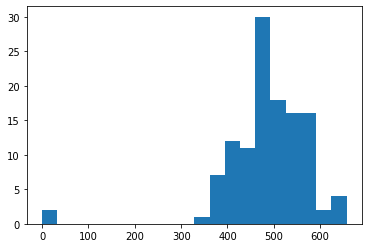

In [12]:
import matplotlib.pyplot as plt
plt.hist(spike_counts, bins='auto')  # arguments are passed to np.histogram
plt.show()

# <font color="green"> Experiment: Closed loop test

In [13]:
### Set up Maxwell and Opto
maxwell = mgi.MaxwellCtl( config="/home/mxwbio/work/seizure_closed_loop/files/maxwell/configs/2023_04_02_hc328.cfg")              # Turn Maxwell On
stream  = mgi.Streamer( maxwell, filtered=False )                                                                       # Start Livestream
opto_ctl = mgi.OptoCtl( log_file="./files/opto/logs/2023_04_02_hc328_6", 
                   calibration_file="./files/opto/calibrations/20230308T140514-ucsf-opto-system-b_real-530nm-1a-v1.csv", arduino_path="/dev/ttyACM11")       # Set up Opto
maxwell.recordingStart( data_file="/home/mxwbio/work/seizure_closed_loop/files/maxwell/recordings/2023_04_02_hc328_6.h5")   # Start recording data             




# Define Closed Loop Experiment
print("Starting closed loop")
last_opto = 0
experiment_end = time.time() + 120                                    # End the experiment in 20 seconds
first_time = True
spike_counts = []
while time.time() < experiment_end:                                  # while the experiment hasn't run for 20 seconds
    count_time = time.time() + .5                                     # Count spikes over 1 second window
    spike_count = 0                                                  # continually add new spikes to spike_count
    while time.time() < count_time:                                  # while still in 1 second window
        frameID, voltages, spikes = stream.getData()                 # get spikes data
        for spike in spikes:                                         # if there's a spike add it to the spike_count
            spike_count += 1
    print("Spike Count: ", spike_count )    
    if not first_time:
        spike_counts.append(spike_count)
    

    if spike_count > 550 and time.time()>last_opto+15 and not first_time:                # If tehre are more than 10 spikes in a second
        print("Starting Opto Pulses")                                # Do some opto pulses
        opto_ctl.pulses(  on_duration=10000, off_duration=200, num_pulses=1, intensity=.9)
        # on long pulse: 
        #opto_ctl.pulses(  on_duration=3000, off_duration=200, num_pulses=2, intensity=.2 )
        
        print("finished pulses")
        #print("emptying artifact spikes")
        last_opto = time.time()
        #empty_time = time.time()+10                                  # wait 10 second to empty out previous data from stream
        #while time.time() < empty_time:
        #    stream.getData()                                         # Empty out stream data, because pulses created many fake spikes
        #print("finished emptying")    
    first_time = False
    
print("experiment finished")    



# Shut Down Experiment
print("shutting down devices")
del stream                # Stop Stream
opto_ctl.close()          # Stop Opto
maxwell.recordingStop()  # stop recording
print("done")

MaxOne initialized
maxwell streamer ready
Available USB devices:
('ASRL/dev/ttyACM11::INSTR',)
recording_filename 20230402T144122-2023_04_02_hc328_6
stim_log_file: ./files/opto/logs/20230402T144122-2023_04_02_hc328_6_opto_stim_log.csv
CSV file is 0
Recording Started
Starting closed loop
Spike Count:  635
Spike Count:  561
Starting Opto Pulses
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.9 	 delay/on/off (frames): 0 / 200000 / 4000
finished pulses
Spike Count:  746
Spike Count:  149
Spike Count:  281
Spike Count:  191
Spike Count:  226
Spike Count:  293
Spike Count:  215
Spike Count:  211
Spike Count:  266
Spike Count:  229
Spike Count:  251
Spike Count:  218
Spike Count:  249
Spike Count:  241
Spike Count:  230
Spike Count:  212
Spike Count:  297
Spike Count:  261
Spike Count:  207
Spike Count:  237
Spike Count:  280
Spike Count:  125
Spike Count:  193
Spike Count:  225
Spike Count:  228
Spike Count:  241
Spike Count:  369
Spike Count:  281
Spike Count:  342
Spike Count:  282


**Epxeriments**
* 2023_04_02_hc328_6: shine opto if spike rate is over 550 spikes in .5s. Shines light at .9 intensity for 10s.

# <font color="green">Expirement: Light intensity test

In [17]:
maxwell = mgi.MaxwellCtl( config="/home/mxwbio/work/seizure_closed_loop/files/maxwell/configs/2023_04_02_hc328.cfg")              # Turn Maxwell On
opto_ctl = mgi.OptoCtl( log_file="./files/opto/logs/2023_04_02_hc328_7", 
                   calibration_file="./files/opto/calibrations/20230308T140514-ucsf-opto-system-b_real-530nm-1a-v1.csv", arduino_path="/dev/ttyACM11")       # Set up Opto
maxwell.recordingStart( data_file="/home/mxwbio/work/seizure_closed_loop/files/maxwell/recordings/2023_04_02_hc328_7.h5")   # Start recording data             

print("Starting experiments")
time.sleep(10)
for light in [.1,.2,.3,.4,.5,.6,.7,.8,.9]:
    print("Intinsity: ",light)
    print("Light On")
    opto_ctl.pulses(  on_duration=10000, off_duration=200, num_pulses=1, intensity=light)
    print("Light Off")
    time.sleep(20)

# Shut Down Experiment
print("shutting down devices")
opto_ctl.close()          # Stop Opto
maxwell.recordingStop()  # stop recording
print("done")

MaxOne initialized
Available USB devices:
('ASRL/dev/ttyACM11::INSTR',)
recording_filename 20230402T145210-2023_04_02_hc328_7
stim_log_file: ./files/opto/logs/20230402T145210-2023_04_02_hc328_7_opto_stim_log.csv
CSV file is 0
Recording Started
Starting experiments
Intinsity:  0.1
Light On
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.1 	 delay/on/off (frames): 0 / 200000 / 4000
Light Off
Intinsity:  0.2
Light On
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.2 	 delay/on/off (frames): 0 / 200000 / 4000
Light Off
Intinsity:  0.3
Light On
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.3 	 delay/on/off (frames): 0 / 200000 / 4000
Light Off
Intinsity:  0.4
Light On
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.4 	 delay/on/off (frames): 0 / 200000 / 4000
Light Off
Intinsity:  0.5
Light On
Stim pulse 	 use_maxwell: True 	 arduino_intensity: 0.5 	 delay/on/off (frames): 0 / 200000 / 4000
Light Off
Intinsity:  0.6
Light On
Stim pulse 	 use_maxwell: True 	 arduino

**experiment**
* hc328_7: Shined light at different intensities. Light on 10 seconds. 20 seconds inbetween. Light had an affect at .4

# Other junk

In [ ]:
print("starting opto debug")
opto_ctl = mgi.OptoCtl( log_file="./files/opto/logs/opto_debug", 
                   calibration_file="./files/opto/calibrations/20230203T152939-ucsf-opto-system-a_real-625nm-1a-v1.csv", arduino_path="/dev/ttyACM11")   
opto_ctl.pulses(  on_duration=3000, off_duration=200, num_pulses=2, intensity=.2 )
opto_ctl.close()          # Stop Opto

In [ ]:
print("starting opto debug")
opto_ctl = mgi.OptoCtl( log_file="./files/opto/logs/opto_debug", 
                   calibration_file="./files/opto/calibrations/20230203T152939-ucsf-opto-system-a_real-625nm-1a-v1.csv", arduino_path="/dev/ttyACM11")   
opto_ctl.pulses(  on_duration=3000, off_duration=200, num_pulses=2, intensity=.9 )
opto_ctl.pulses(  on_duration=3000, off_duration=200, num_pulses=2, intensity=.2 )
opto_ctl.pulses(  on_duration=3000, off_duration=200, num_pulses=2, intensity=.9 )
opto_ctl.close()          # Stop Opto

In [ ]:
print("starting opto debug")
opto_ctl = mgi.OptoCtl( log_file="./files/opto/logs/opto_debug", 
                   calibration_file="./files/opto/calibrations/20230203T152939-ucsf-opto-system-a_real-625nm-1a-v1.csv", arduino_path="/dev/ttyACM11")   
opto_ctl.pulses(  on_duration=25, off_duration=25, num_pulses=100, intensity=.9 )
opto_ctl.close()          # Stop Opto

# Run Closed Loop Opto Experiment.

Initialize environment

In [ ]:
### Set up Maxwell and Opto
maxwell = mgi.MaxwellCtl( config="/home/mxwbio/work/seizure_closed_loop/files/maxwell/configs/config.cfg")              # Turn Maxwell On
stream  = mgi.Streamer( maxwell, filtered=False )                                                                       # Start Livestream
opto_ctl = mgi.OptoCtl( log_file="./files/opto/logs/CheckCheck", 
                   calibration_file="./files/opto/calibrations/test_calib.csv", arduino_path="/dev/ttyACM11")       # Set up Opto
maxwell.recordingStart( data_file="/home/mxwbio/work/seizure_closed_loop/files/maxwell/recordings/CheckCheck.h5")   # Start recording data             

# Define Closed Loop Experiment
print("Starting closed loop")
last_opto = 0
experiment_end = time.time() + 50                                    # End the experiment in 20 seconds
while time.time() < experiment_end:                                  # while the experiment hasn't run for 20 seconds
    count_time = time.time() + 1                                     # Count spikes over 1 second window
    spike_count = 0                                                  # continually add new spikes to spike_count
    while time.time() < count_time:                                  # while still in 1 second window
        frameID, voltages, spikes = stream.getData()                 # get spikes data
        for spike in spikes:                                         # if there's a spike add it to the spike_count
            spike_count += 1
    print("Spike Count: ", spike_count )    
    
    if spike_count > 10 and time.time()>last_opto+15:                # If tehre are more than 10 spikes in a second
        print("Starting Opto Pulses")                                # Do some opto pulses
        opto_ctl.pulses(  on_duration=4000, off_duration=1000, num_pulses=3, intensity=.9 )
        print("finished pulses")
        #print("emptying artifact spikes")
        last_opto = time.time()
        #empty_time = time.time()+10                                  # wait 10 second to empty out previous data from stream
        #while time.time() < empty_time:
        #    stream.getData()                                         # Empty out stream data, because pulses created many fake spikes
        #print("finished emptying")
print("experiment finished")    

# Shut Down Experiment
print("shutting down devices")
del stream                # Stop Stream
opto_ctl.close()          # Stop Opto
maxwell.recordingStop()  # stop recording
print("done")

# <font color="brown">Opto Test

In [ ]:
opto_ctl = OptoCtl( log_file="./files/opto/logs/CheckCheckCheck", calibration_file="./files/opto/calibrations/test_calib.csv", arduino_path="/dev/ttyACM10")

In [ ]:
opto_ctl.pulses(  on_duration=4000, off_duration=1000, num_pulses=3, intensity=.9 )

In [ ]:
opto_ctl.close()